# Prerequisite Knowledge Test
### import statements

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## question 1
1. load the data set in x.csv, into a pandas dataframe.


In [7]:
data = pd.read_csv('x.csv', header=None)
data.columns = data.iloc[0]
data = data.drop(0, axis=0)
data = data.astype(float)
print(data)

0           V1         V2        V3        V4        V5        V6        V7   
1    -2.162804 -10.961029 -0.621498 -2.803665 -0.580941 -0.580710 -0.581963  \
2    -1.291995 -10.105274  1.395344 -2.410507 -0.528001 -0.529797 -0.528555   
3    -1.134455 -10.443600 -2.955879 -1.418108 -1.181266 -1.181214 -1.179092   
4     0.852331 -11.353038  0.875886 -1.845476  1.072317  1.073025  1.072928   
5    -0.333579 -10.635619 -0.603898 -2.034150 -1.402213 -1.400313 -1.401911   
...        ...        ...       ...       ...       ...       ...       ...   
2044  0.023132  -9.311094 -2.131136 -4.087130  0.209641  0.208257  0.208621   
2045 -2.299781  -9.695048 -0.227320 -0.836117  0.939085  0.937953  0.937301   
2046 -0.664126  -9.201309  1.720920 -2.341774  1.418704  1.418204  1.418829   
2047 -1.498205  -8.976333  1.204337 -3.933410  0.146557  0.144868  0.144880   
2048 -1.150925 -10.830732  1.676142 -1.400922 -1.490902 -1.490875 -1.489613   

0            V8        V9       V10  ...       V23 

2. find the two variables with the largest variances

In [8]:

varience = data.var().sort_values(ascending=False)
sorted_data = data[varience.index]
highest_variences = sorted_data.iloc[:, 0:2]
print(f"largest var: {highest_variences.columns[0]}")
print(f"Second largest var: {highest_variences.columns[1]}")

largest var: V4
Second largest var: V26


3. make a scatterplot of the data items using these two variables found in question 2

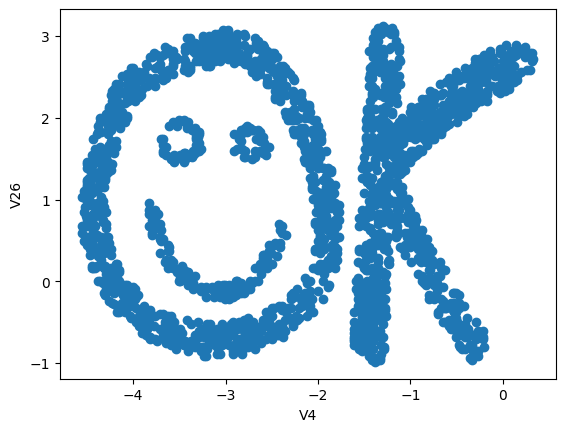

In [9]:
plt.scatter(highest_variences.iloc[:, 0], highest_variences.iloc[:, 1])
plt.xlabel(highest_variences.columns[0])
plt.ylabel(highest_variences.columns[1])
plt.show()

## Question 2
1. Solve numerically and report the eigenvalues λi and column eigenvectors xi, where i ∈ {1, 2}. Normalise the eigenvectors to unit length (if necessary).

In [10]:
A = np.array([[1, 2], 
              [2, 3.14159]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Question 2.1")
print("------------")
print("eigenvalues:")
print(eigenvalues)
print("\neigenvectors:")
print(np.matrix(eigenvectors))
print()

Question 2.1
------------
eigenvalues:
[-0.19781734  4.33940734]

eigenvectors:
[[-0.85790571 -0.51380716]
 [ 0.51380716 -0.85790571]]



2. verify that the eigenvectors are orthogonal

In [11]:
orthogonal = np.dot(eigenvectors[:, 0], eigenvectors[:, 1])
norms = np.linalg.norm(eigenvectors, axis=0)
print("Question 2.2")
print("------------")
print("dot product rounded to 5th digit (orthogonality check)", orthogonal.round(5))
print("Norms (normalization check):", norms)
print()

Question 2.2
------------
dot product rounded to 5th digit (orthogonality check) -0.0
Norms (normalization check): [1. 1.]



3. Show, by performing the numerical matrix computation, that A satisfies the equation

In [12]:
new_A =np.zeros((2, 2))
for i in range(len(A)):
    eigenvalue_matrix = eigenvalues[i] * np.identity(2)
    new_A += np.dot(eigenvalue_matrix, 
                    eigenvectors[:, i].reshape(2, 1) * eigenvectors[:, i].reshape(1, 2))
print("Question 2.3")
print("------------")
print("Matrix A:")
print(np.matrix(A))
print()
print("Matrix remade A:")
print(np.matrix(new_A))

Question 2.3
------------
Matrix A:
[[1.      2.     ]
 [2.      3.14159]]

Matrix remade A:
[[1.      2.     ]
 [2.      3.14159]]


## Question 3
### Task a.
to prove E is a linear operator, we need to show that E holds under:
1. additivy: E[f + g] = E[f] + E[g] 
2. multiplicity: E[cf] = cE[f]

for some real valued random variables f, g and scaler c.

1. Addivilty:

    Let f and g be some real valued random variables. we have: 

    E[f + g] = Σ (P(ω) * (f(ω) + g(ω))) for all ω in Ω  

             = Σ (P(ω) * (f(ω)) + P(ω) * g(ω))  
             = Σ (P(ω) * (f(ω)) + Σ (P(ω) * g(ω)))  
             = E[f] + E[g]
                
2. Multiplicity:

    let f be some real valued random variable, and c be a scaler. we have: 

    cE[f] = c(Σ (P(ω) * (f(ω))))  
    
          = Σ (c * P(ω) * (f(ω)))  
          = Σ (P(ω) * (c * f(ω)))            
          = E[cf]

As E holds under Additivity and Multiplicity, E is a linear operator

### Task b. 

We know, Var[X] = E[(X - µ)^2]  

                  = E[(X^2 -2µX + µ^2)]  
                  = E[X^2] - E[2µX] + E[µ^2] {using properties of linear operators}  
                  = E[X^2] - 2E[X]E[X] + E[X]^2 {as µ = E[X]}  
                  = E[X^2] - 2E[x]^2 + E[X]^2  
                  = E[X^2] - E[X]^2 
                
thus, we have Var[X] = E[X^2] - E[X]^2

## Question 4:
### Task a: 

we have:

        P(Y | X) = P(Y ∧ X)/P(X) {def of conditional probability}  
        P(Y | X) = P(X ∧ Y)/P(X) {by properties of union}  
        P(Y | X)*P(X) = P(X ∧ Y)

Thus we get  
**[1]** P(Y | X)*P(X) = P(X ∧ Y)

Now solving for P(X | Y): 

        P(X | Y) = P(X ∧ Y)/P(Y)  
                 = P(Y | X) * P(X) / P(Y) {using [1]}

which is Bayes' rule

### Task b:

Defining Boolean random variables: 

A : A person who is alergic to pollen  
A': A person who is not allergit to pollen  
T : Test result is positive  
T': Test result is negative    

we have: 

        P(T |A') = .23  
        P(T |A ) = 1- .23 = .77 
        P(T'|A ) = .15  
        P(T'|A') = 1-.15  = .85  
        P(A)     = .20  
        P(A')    = 1-.20  = .80

1. first we need to find P(T)

        P(T) = P(T ∣A ) ∗ P(A) + P(T ∣A′) ∗ P(A′)  
        P(T) = .77 * .20 + .23 * .80  
        P(T) = 0.354  

2. now we solve for P(A |T ):  

        P(A | T) = P(T |A ) * P(A) / P(T)  
        P(A | T) = .77 * .20 / 0.354  
        P(A | T) = 0.480

Thus We get:  
P(A | T) = 0.480

## Question 5
### Task a
we can find the value of b S.T. f(b) is minimised using the 0s of the derrivitive of f(b) with respect to b.

First we expand f(b): 

f(b) = ∑(i=1, 3) (b^2*xi^2 - 2*b*xi*yi + yi^2)

and take its derrivitive:

df/db = ∑(i=1, 3) (2b*xi^2 - 2*xi*yi)

Now we solve for df/db = 0

df/db = 0

    0 = ∑(i=1, 3) (2b*xi^2 - 2*xi*yi)  
    0 = (∑(i=1, 3) (2b*xi^2))  - (∑(i=1, 3) (2*xi*yi))  
    0 = 2b*(∑(i=1, 3) (xi^2)) - (∑(i=1, 3) (2*xi*yi))  
    b = (∑(i=1, 3) 2*xi*yi) / 2*(∑(i=1, 3) xi^2)  
    b = 2*(x1*y1 + x2*y2 + x3*y3) / 2*((x1)^2+(x2)^2+(x3)^2) {inputing x and y values}  
    b = (x1*y1 + x2*y2 + x3*y3) / ((x1)^2+(x2)^2+(x3)^2)  

- (note as f(b) is a convex polynomial of the 2nd degree, thus b is a local minimum)

**thus when we have**  
**b  = (x1*y1 + x2*y2 + x3*y3) / ((x1)^2+(x2)^2+(x3)^2)**  
**b is the value that minimises the value of f(b)**

### task b:
1. **non-zero:**  
    if xi = yi = 0, for all i ∈ {1, 2, 3}, then for all values of b, f(b) = 0
2. **non-colinear:**  
    if xi = yi where i ∈ {1, 2, 3}, then for all values of b, f(b) = 0 
3. **finite:**  
    if xi is non-finite or yi is non-finite for any i ∈ {1, 2, 3} f(b) will not have a real solution. 

## Problem 6: 
### Task a: 

**in sudo-code:**  

Function FibonacciNumbersUpToN(n)  

        Declare a as Integer := 0  
        Declare b as Integer := 1  
        Declare fibs as List  

        For i from 0 to n-1
            // Update the values of a and b such that:  
            // a receives the value of b  
            // b receives the value of a + b  
            Swap a with b  
            b := a + b  

            // Add the new value of a to the list  
            Add a to fibs  

        // Return the list containing the Fibonacci sequence of numbers to n  
        Return fibs  

    
**in python:**  

In [10]:
def fibonacci_to_n(n):
    a = 0
    b = 1
    fibs=[]
    for i in range(n):
        a, b = b, a+b
        fibs.append(a)
    return fibs

if __name__ == "__main__":
    print("Task A")
    print("------------")
    fibs = fibonacci_to_n(10)
    for i in range(len(fibs)):
        print(f"number: {i+1}, fibonacci number: {fibs[i]}")

Question 3
------------
number: 1, fibonacci number: 1
number: 2, fibonacci number: 1
number: 3, fibonacci number: 2
number: 4, fibonacci number: 3
number: 5, fibonacci number: 5
number: 6, fibonacci number: 8
number: 7, fibonacci number: 13
number: 8, fibonacci number: 21
number: 9, fibonacci number: 34
number: 10, fibonacci number: 55


### Task b:
There is one loop that iterates from 1 to n (time complexity of O(n)) the rest of the algorithm has no other loops (time complexity of O(1)), thus the time complexity of this algorithm is O(n).